In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import curve_fit
import numpy as np

In [259]:
df = pd.read_csv('df_heattime.csv')
df['time'] = pd.to_datetime(df['time'])
# df = df.sort_values(by='heattime', ascending=True)

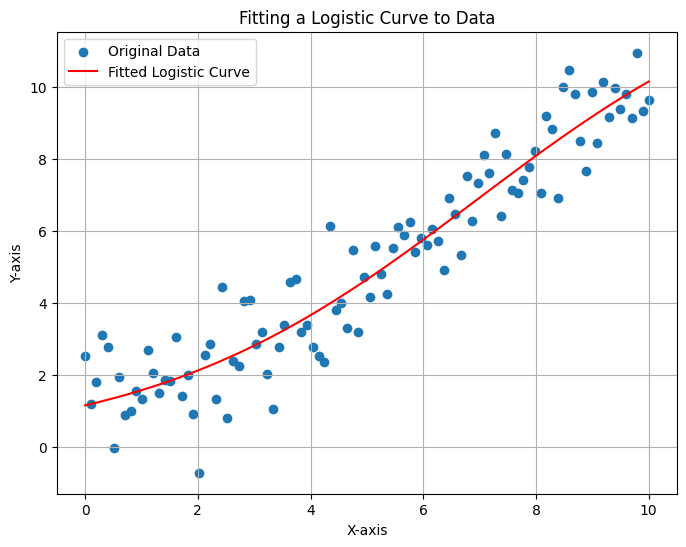

In [260]:
def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Generate sample data
np.random.seed(0)
x_data = np.linspace(0, 10, 100)
y_data = 10 / (1 + np.exp(-0.5 * (x_data - 5))) + np.random.normal(size=x_data.size)
# print(x_data)
# print(y_data)


# Fit the logistic curve to the data
params, covariance = curve_fit(logistic_function, x_data, y_data, p0=[max(y_data), np.median(x_data), 1])
# print(params)
# print(covariance)

# Extract the parameters for the fitted curve
L_fit, k_fit, x0_fit = params
# print(logistic_function(x_data, L_fit, k_fit, x0_fit))

# Plotting the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, logistic_function(x_data, L_fit, k_fit, x0_fit), color='red', label='Fitted Logistic Curve')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Fitting a Logistic Curve to Data')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/6n/df4bbytx0tqfkq05t0fhwb080000gn/T/ipykernel_66423/1312364197.py:2: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0))) + b


[1.12819660e+01 5.54824828e-03 1.13290587e+03 4.18905579e+00]
Correlation coefficient: 0.9818192553946257


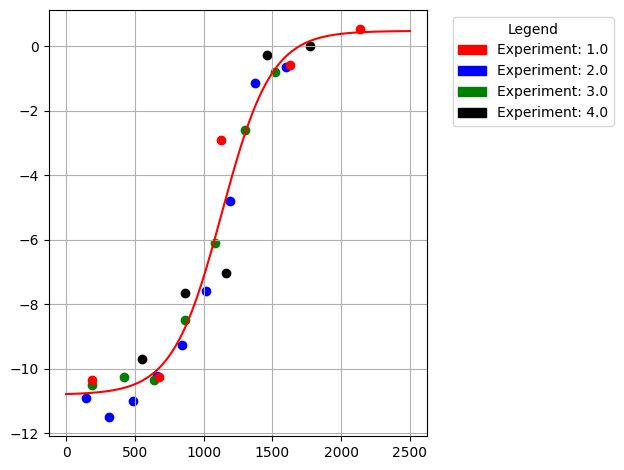

In [261]:
def logistic_function(x, L, k, x0, b):
    return L / (1 + np.exp(-k * (x - x0))) + b

df = df.dropna()## cant handle nan values
df = df.drop(22)## drop outlier from bad experiment


# df = df.sort_values(by='heattime', ascending=True)


x_data = df['heattime'].to_numpy()
# x_data = np.sort(x_data)
y_data = df['velocity'].to_numpy() +15
## scale y data from 0 to 1
# y_data = (y_data - np.min(y_data)) / (np.max(y_data) - np.min(y_data))
# print(x_data)
# print(y_data)


params, covariance = curve_fit(logistic_function, x_data, y_data, p0=[15, 1, 1125, 4], method='dogbox')
L_fit, k_fit, x0_fit, b_fit = params

print(params)

color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'black', 4: 'orange', 5: 'purple', 6: 'pink', 7: 'yellow', 8: 'brown', 9: 'grey'}

df['experimentcolor'] = df['experiment'].map(color_dict)



## showing correlation
y_predicted = logistic_function(x_data, L_fit, k_fit, x0_fit, b_fit)


correlation_coefficient = np.corrcoef(y_data, y_predicted)[0, 1]
print("Correlation coefficient:", correlation_coefficient)

## Plot

for color,subset in df.groupby('experimentcolor'):
    plt.scatter(subset['heattime'], subset['velocity'], color=color)  

# x_data = np.sort(x_data)


x_data_for_plot = np.linspace(0,2500,2500)

# plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data_for_plot, logistic_function(x_data_for_plot, L_fit, k_fit, x0_fit, b_fit)-15, color='red', label='Fitted Logistic Curve')
# plt.plot(x_data, logistic_function(x_data, 15, 112, x0_fit, b_fit), color='red', label='Fitted Logistic Curve')


# unique_values = df['Values'].unique()
# legend_handles = [mpatches.Patch(color=plt.cm.viridis(i / len(unique_values)), label=f'Value: {value}') for i, value in enumerate(unique_values)]
# plt.legend(handles=legend_handles, title='Legend', loc='upper right')
unique_values = df['experiment'].unique()
legend_handles = [mpatches.Patch(color=color_dict[i], label=f'Experiment: {value+1}') for i, value in enumerate(unique_values)]
plt.legend(handles=legend_handles, title='Legend', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.grid(True)


[0.00000000e+00 1.03543678e-05 2.07661510e-05 ... 9.99994321e-01
 9.99997169e-01 1.00000000e+00]


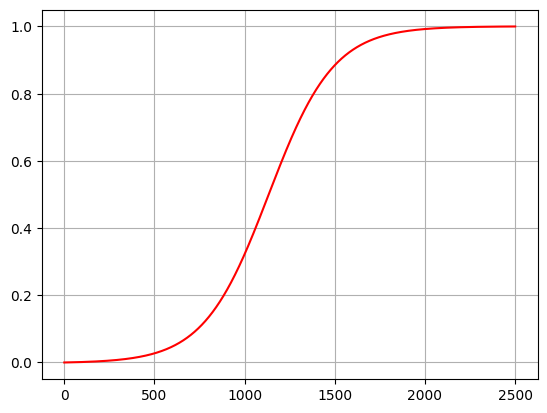

In [263]:
### Plot on a scale from 0 to 1 to have an idea of "cure percentage"

x_data_for_plot = np.linspace(0,2500,2500)

y_values_calclated = logistic_function(x_data_for_plot, L_fit, k_fit, x0_fit, b_fit)-15

y_values_calclated = (y_values_calclated - np.min(y_values_calclated)) / (np.max(y_values_calclated) - np.min(y_values_calclated))
print(y_values_calclated)
plt.plot(x_data_for_plot, y_values_calclated, color='red', label='Fitted Logistic Curve')

plt.grid(True)

